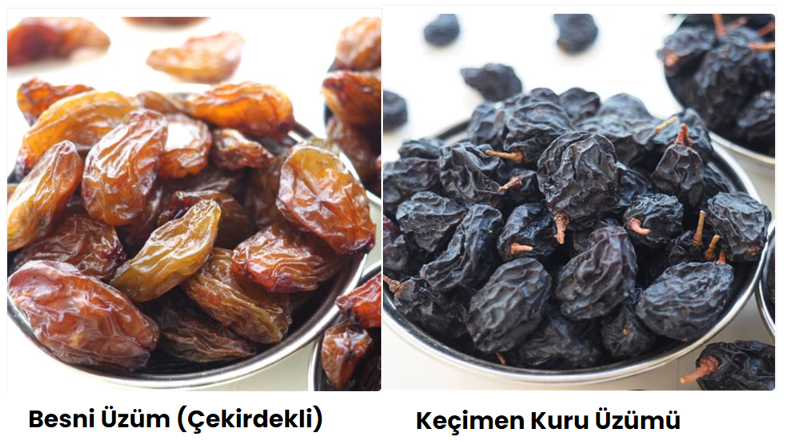

# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

# Import libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, auc,average_precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


import warnings
warnings.filterwarnings("ignore")

## Exploratory Data Analysis and Visualization

In [2]:
df = pd.read_excel("Raisin_Dataset.xlsx")

In [3]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.0,87804.127778,39002.111390,25387.000000,59348.000000,78902.000000,105028.250000,235047.000000
MajorAxisLength,900.0,430.929950,116.035121,225.629541,345.442898,407.803951,494.187014,997.291941
MinorAxisLength,900.0,254.488133,49.988902,143.710872,219.111126,247.848409,279.888575,492.275279
Eccentricity,900.0,0.781542,0.090318,0.348730,0.741766,0.798846,0.842571,0.962124
ConvexArea,900.0,91186.090000,40769.290132,26139.000000,61513.250000,81651.000000,108375.750000,278217.000000
Extent,900.0,0.699508,0.053468,0.379856,0.670869,0.707367,0.734991,0.835455
Perimeter,900.0,1165.906636,273.764315,619.074000,966.410750,1119.509000,1308.389750,2697.753000


In [8]:
df["Class"].value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

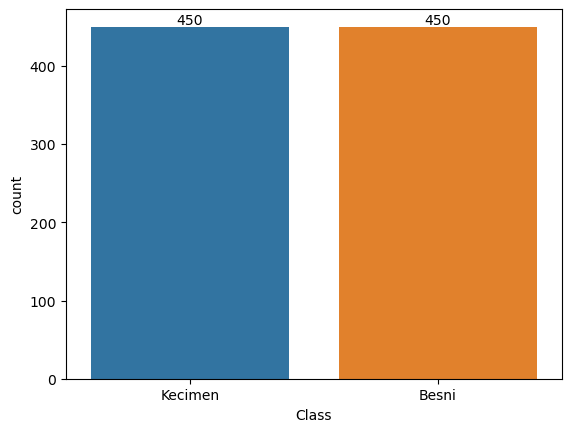

In [9]:
ax = sns.countplot(data = df, x = "Class")
ax.bar_label(ax.containers[0])
plt.show()

In [10]:
# target değişken dengeli dağılmış  balans data

In [11]:
# Target değişkenine nümeric dönüşüm gerçekleştirelim
df["Class"] = df["Class"].map({"Kecimen": 0, "Besni": 1})

In [12]:
df.sample(5)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
625,96210,482.512019,262.674411,0.838833,102157,0.686587,1270.564,1
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,1
17,64762,354.293940,235.752463,0.746474,66713,0.694998,981.509,0
59,25387,225.629541,144.618672,0.767577,26139,0.678144,619.074,0
789,87252,433.484520,261.066644,0.798307,90160,0.735795,1166.517,1


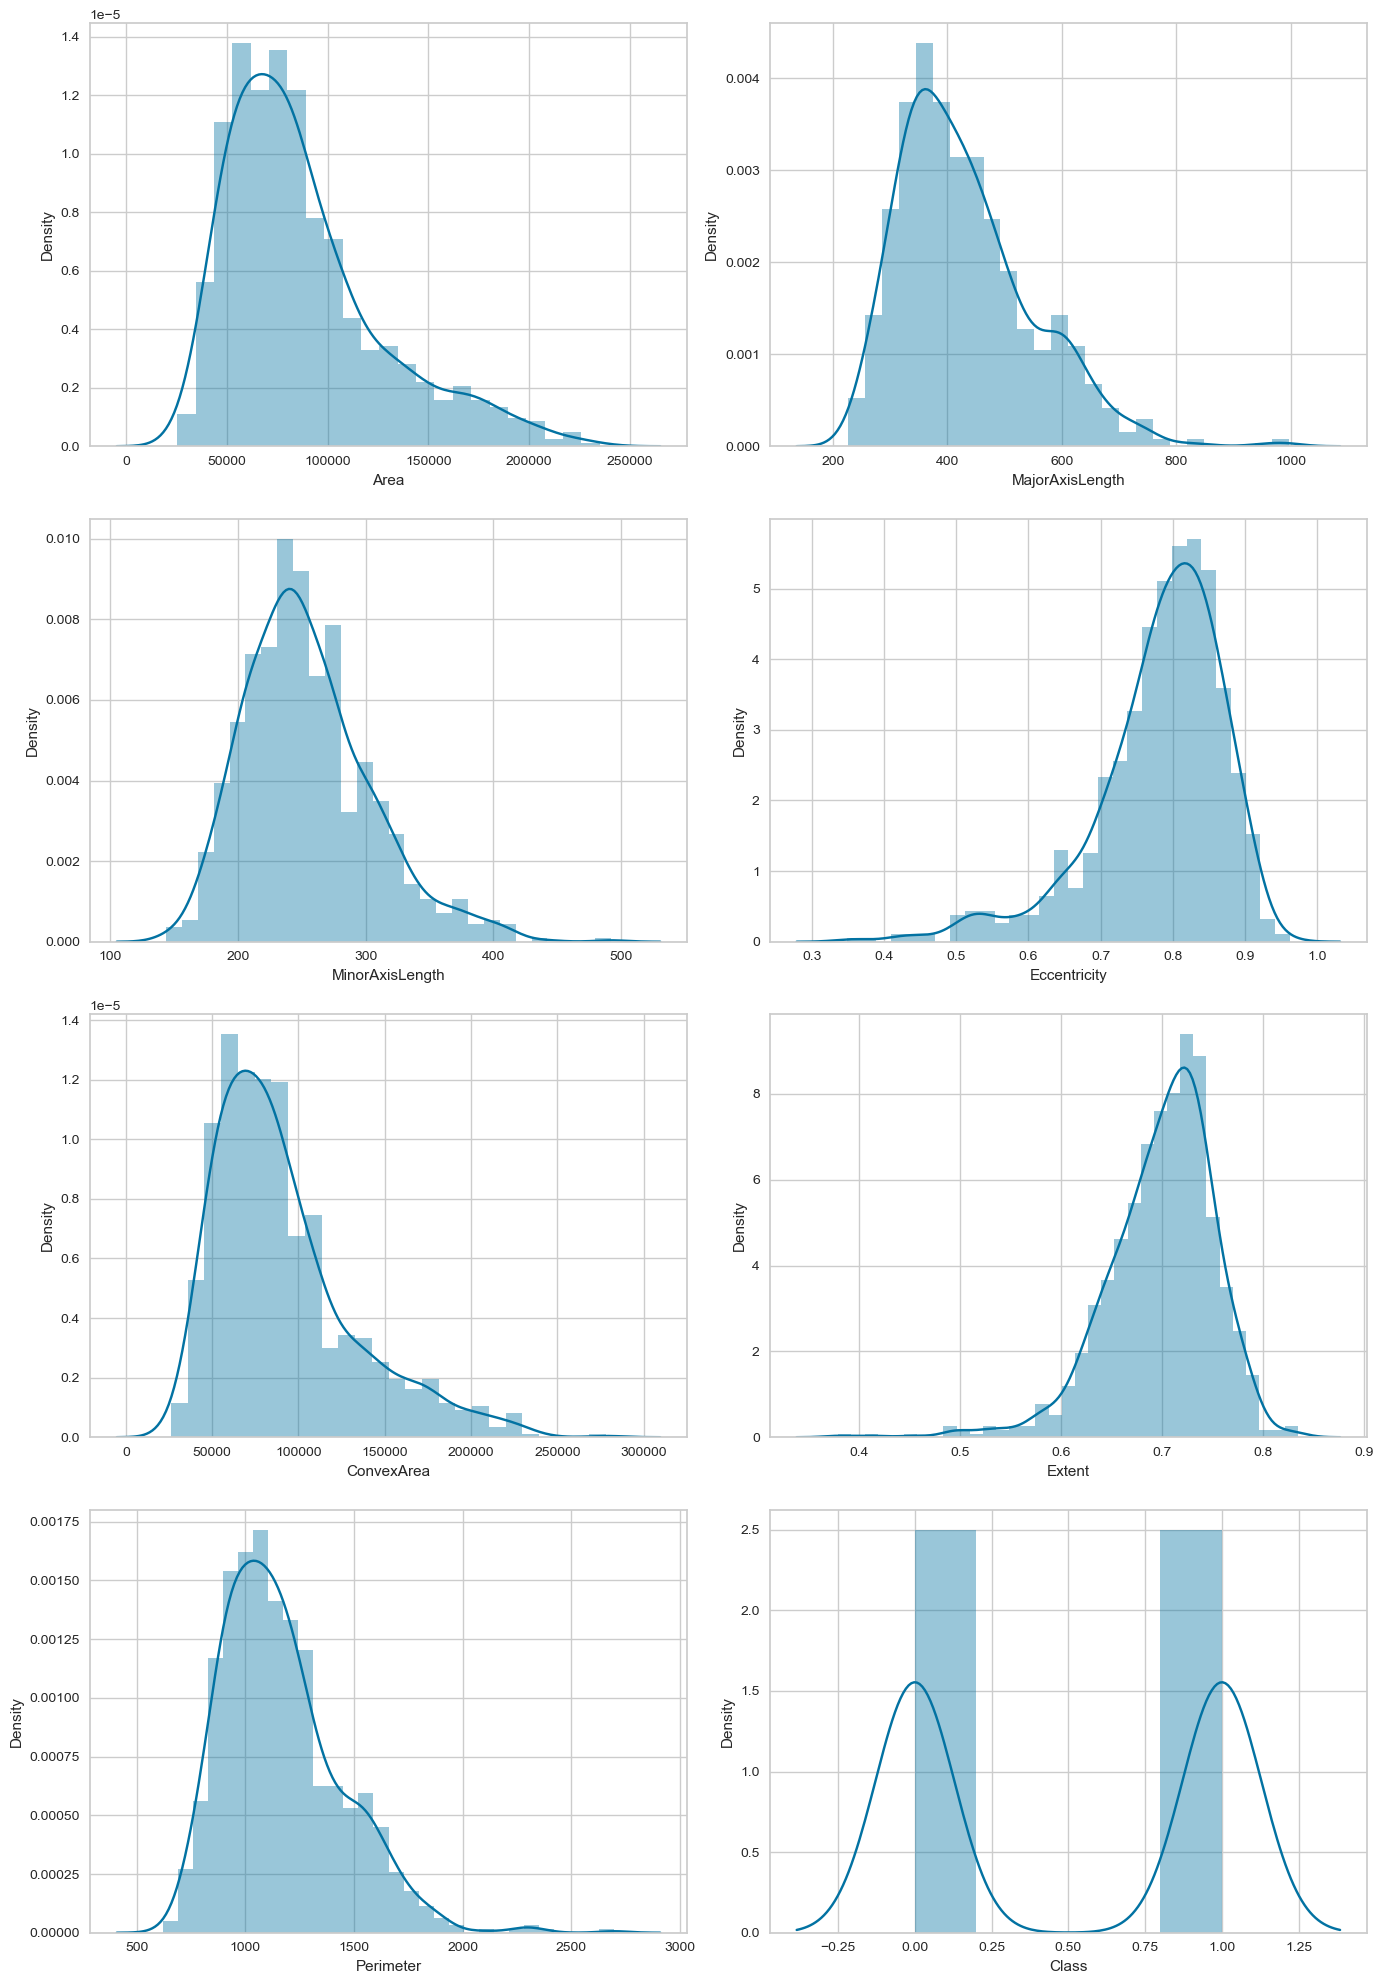

In [15]:
plt.figure(figsize = (14, 20))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(4, 2, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

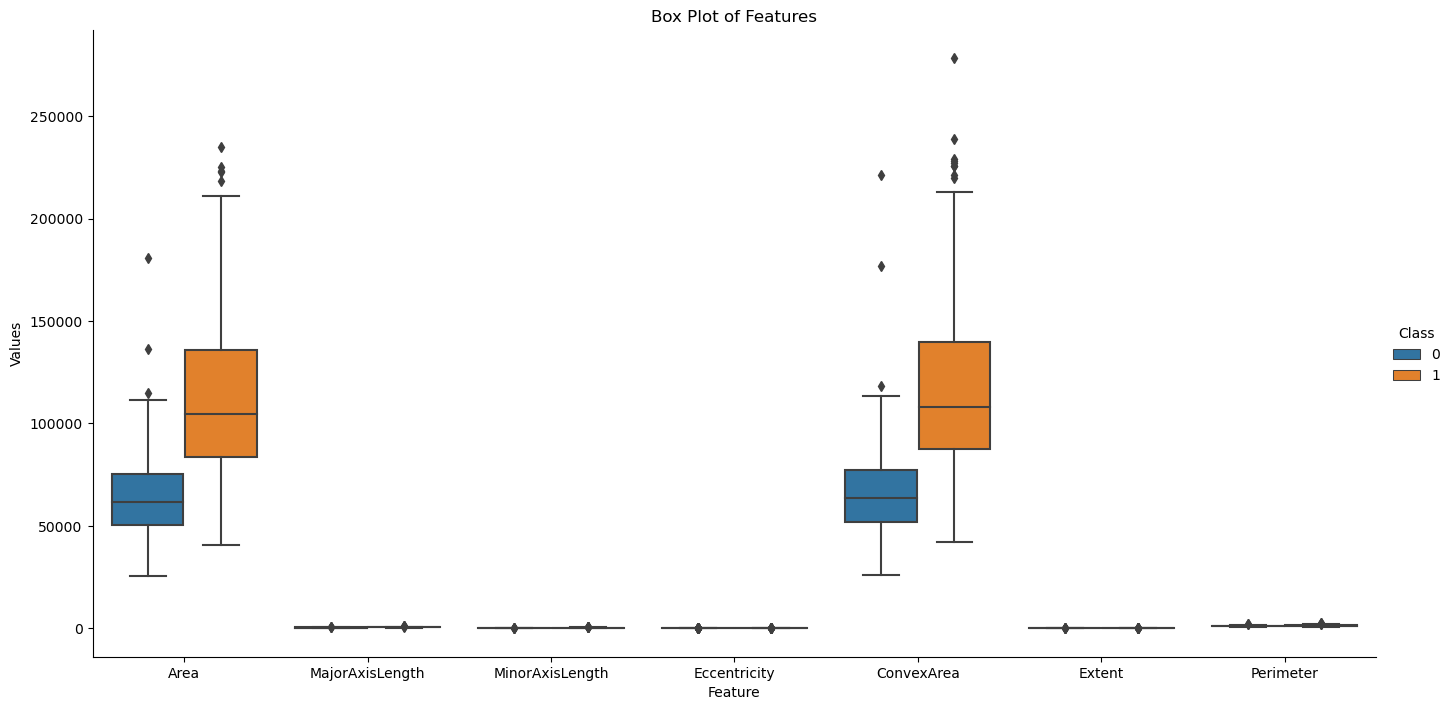

In [21]:
# pd.melt() fonksiyonu, geniş formatlı bir veri çerçevesini uzun formatlı bir veri çerçevesine dönüştürmek için kullanılır
# Yani Sütunları arda arda tek bir dataframe de topluyoruz 
data_to_plot = df.melt(id_vars='Class', value_vars=df.columns[:-1])

# Boxplot 1. yol 
sns.catplot(data=data_to_plot, x="variable", y="value", hue="Class", kind="box", height=7, aspect=2)
plt.xlabel('Feature')
plt.ylabel('Values')
plt.title('Box Plot of Features')

# Display the plot
plt.show()

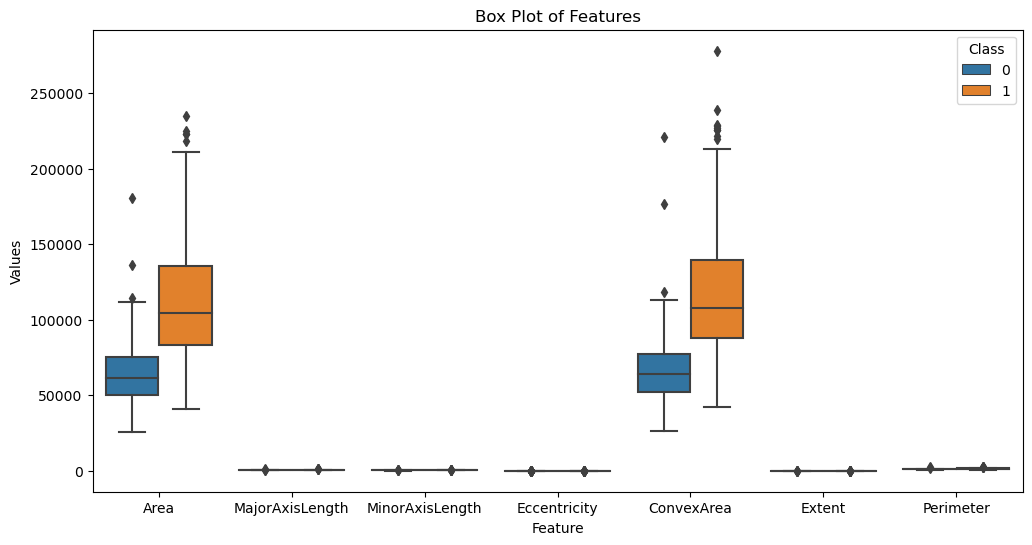

In [22]:
# Boxplot 2. yol 
plt.figure(figsize = (12,6))
sns.boxplot(x = "variable", y = "value", hue = "Class", data= data_to_plot)
plt.xlabel('Feature')
plt.ylabel('Values')
plt.title('Box Plot of Features')
plt.show()

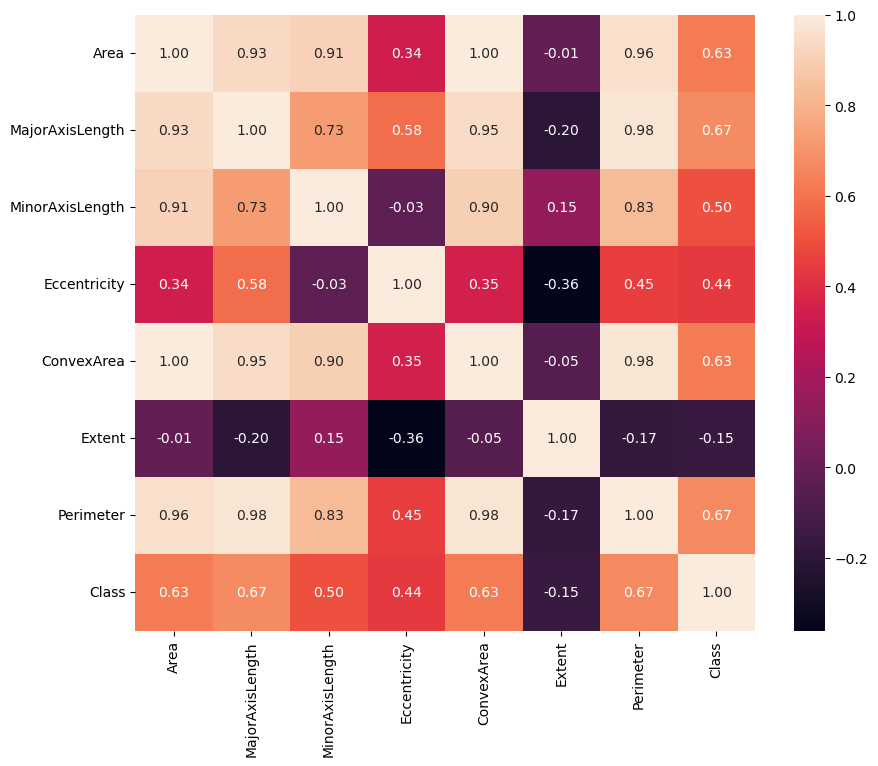

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes('number').corr(), annot = True, fmt = '.2f')
plt.show()

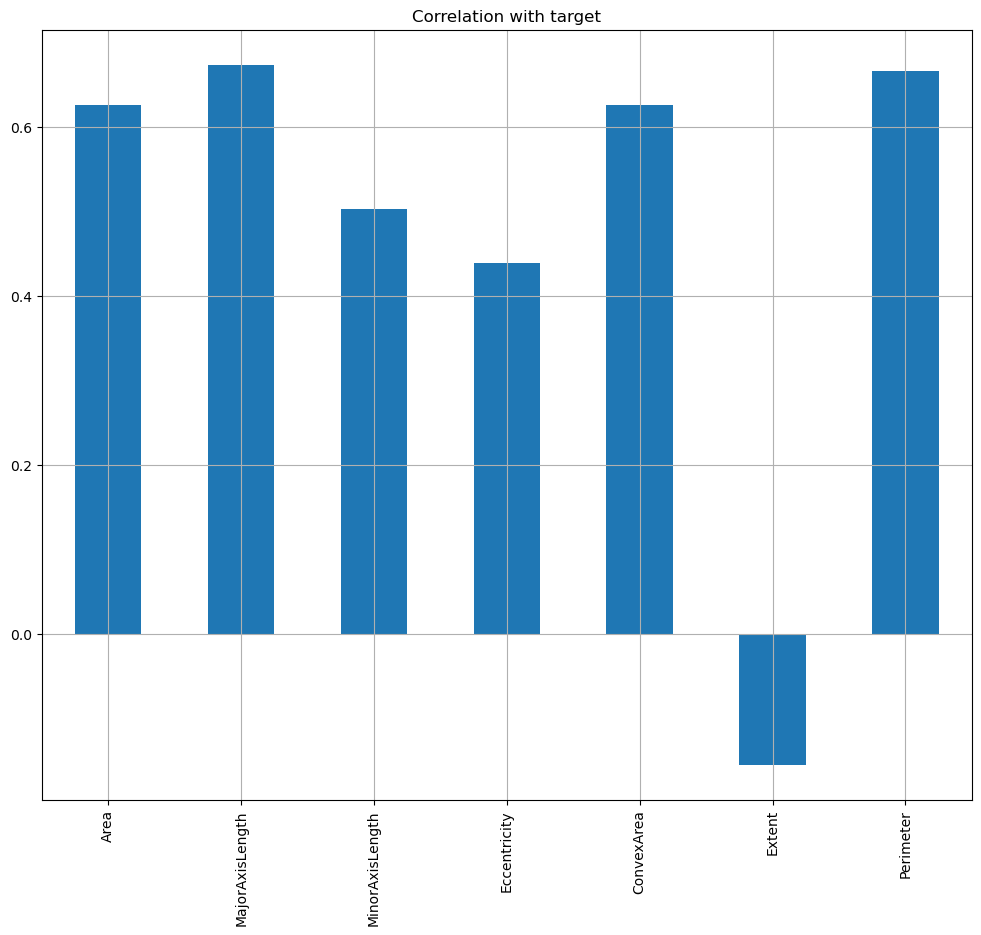

In [24]:
# Correlation with target
df.drop('Class', axis=1).corrwith(df.Class).plot(kind='bar', grid=True, figsize=(12, 10), title="Correlation with target");

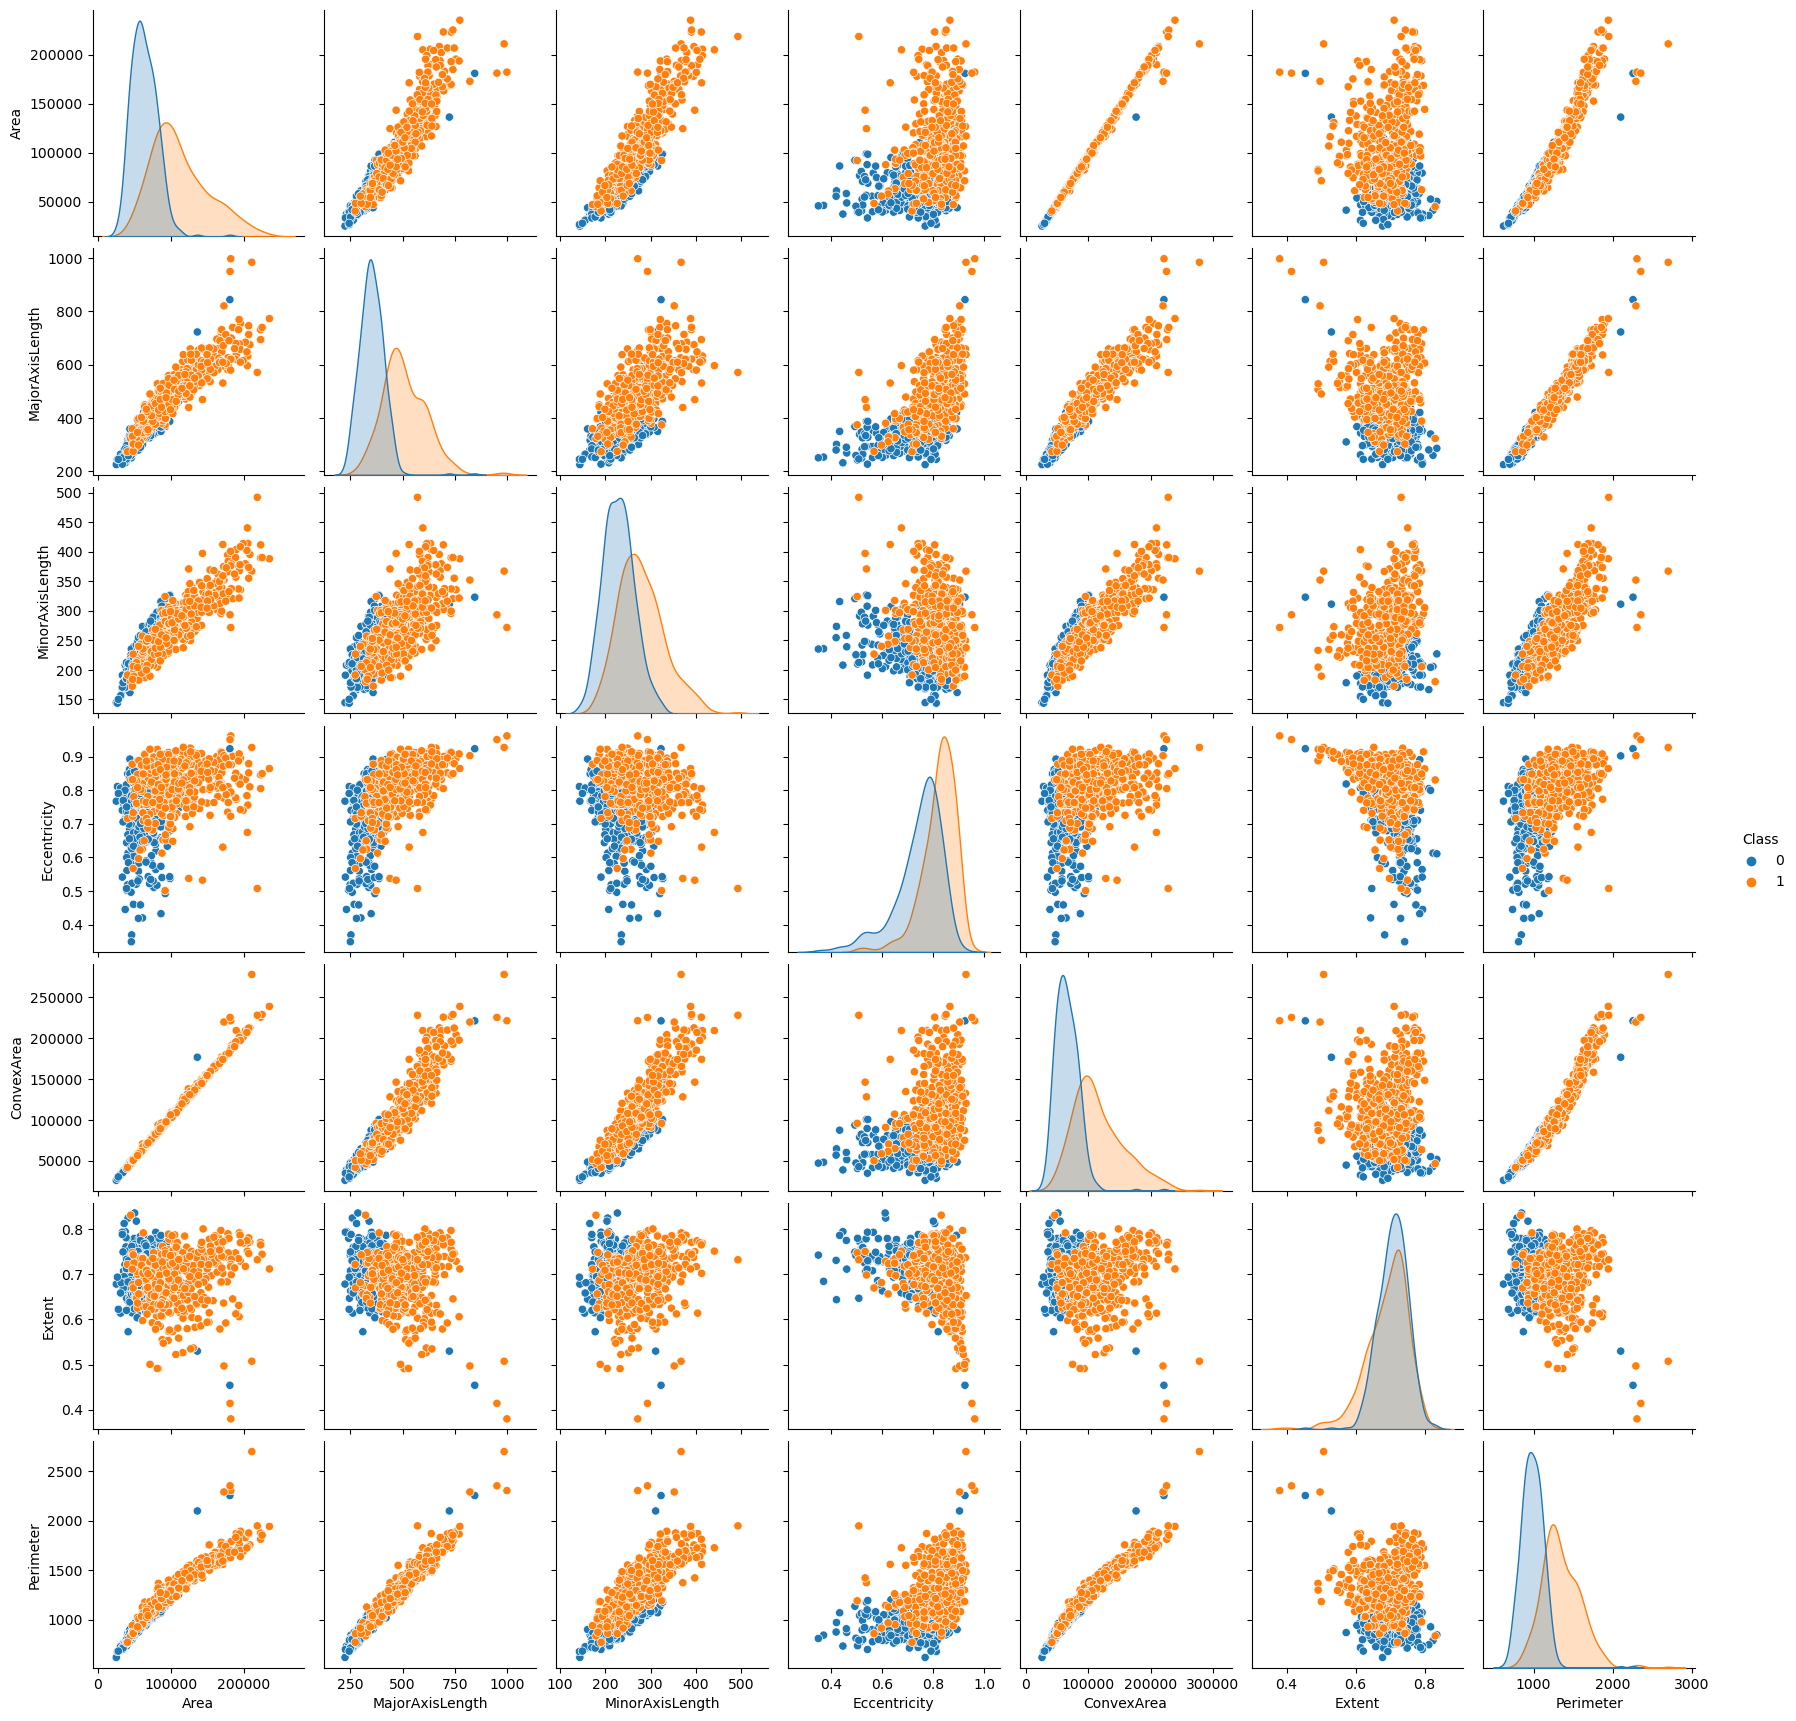

In [25]:
sns.pairplot(df, hue = "Class")
plt.show()

In [26]:
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

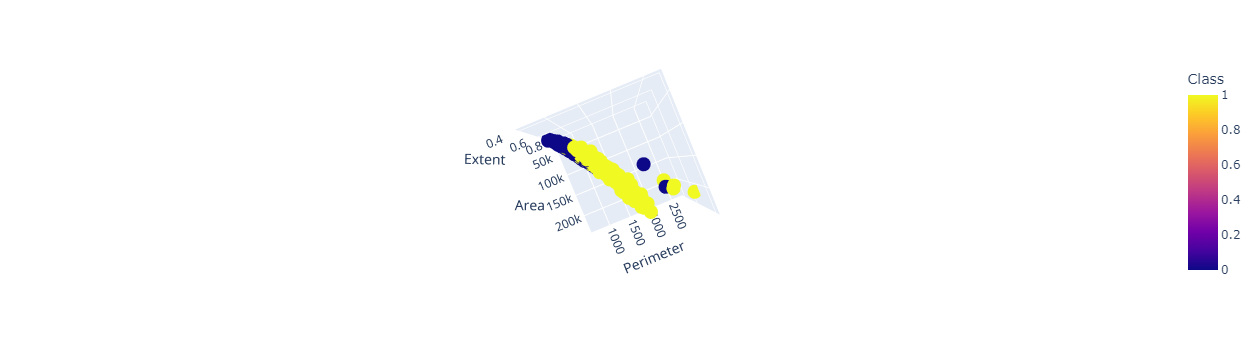

In [27]:
fig = px.scatter_3d(df, x = 'Perimeter', y = 'Area', z = 'Extent', color = 'Class')
fig.show()

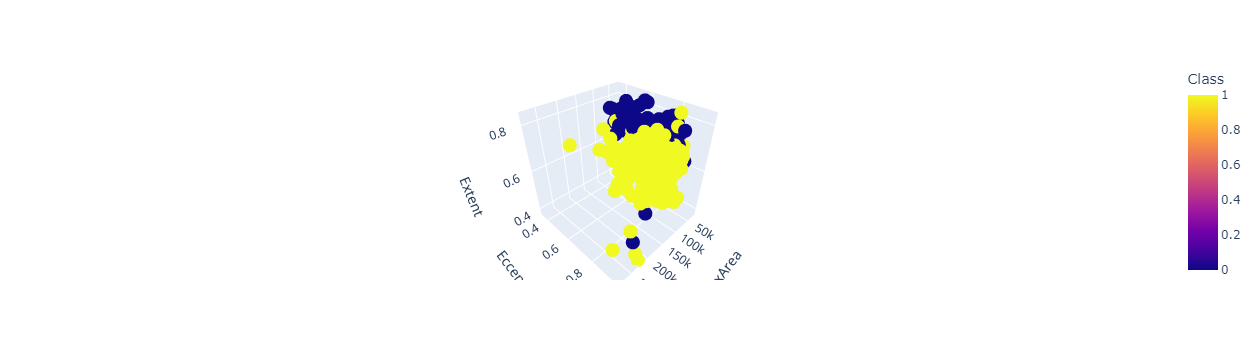

In [29]:
fig = px.scatter_3d(df, x = 'ConvexArea', y = 'Eccentricity', z = 'Extent', color = 'Class')
fig.show()

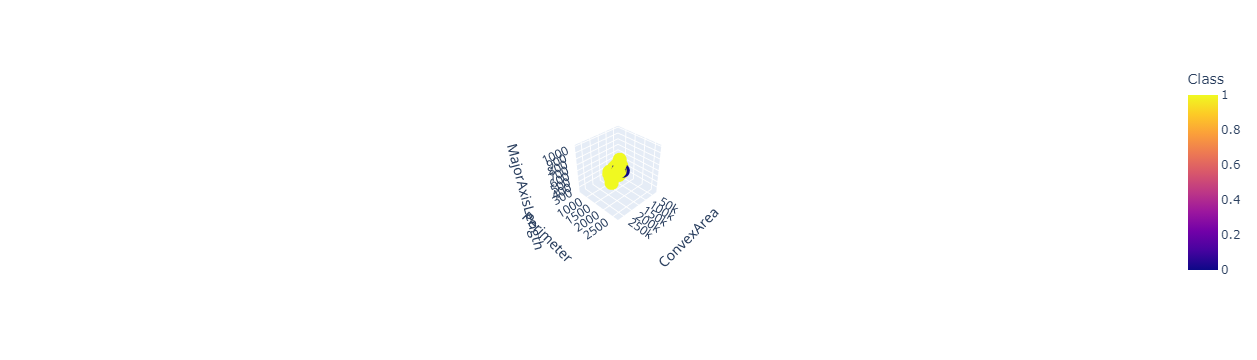

In [30]:
fig = px.scatter_3d(df, x = 'ConvexArea', y = 'Perimeter', z = 'MajorAxisLength', color = 'Class')
fig.show()

* Yukarıda ki 3 boyutlu grafikleri çizdirirken sütun seçiminde kendi aralarında daha az korelasyon olarlar seçilirse grafikten target değişkenin ayrımı daha net görülüyor
* Tam tersi bir durumda sütunlar arasında ilişki yüksek olduğundan target sınıfları daha iç içe geçmiş olduğu görülüyor

## Train | Test Split and Scaling

In [13]:
X = df.drop(["Class"], axis = 1)
y = df["Class"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
scaler = StandardScaler()

In [16]:
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

#  DecisionTreeClassifier Model 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score




# Karar ağacı modelini oluşturma
DT_model = DecisionTreeClassifier(random_state=42)
DT_model.fit(X_train_scaled, y_train)

# Model performansını değerlendirme
y_pred = DT_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Sonuçları yazdırma
print("Model Performansı:")
print("Doğruluk (Accuracy):", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nSınıflandırma Raporu:")
print(class_report)


Model Performansı:
Doğruluk (Accuracy): 0.7888888888888889

Confusion Matrix:
[[73 21]
 [17 69]]

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        94
           1       0.77      0.80      0.78        86

    accuracy                           0.79       180
   macro avg       0.79      0.79      0.79       180
weighted avg       0.79      0.79      0.79       180



##  ROC (Receiver Operating Curve) and AUC (Area Under Curve)

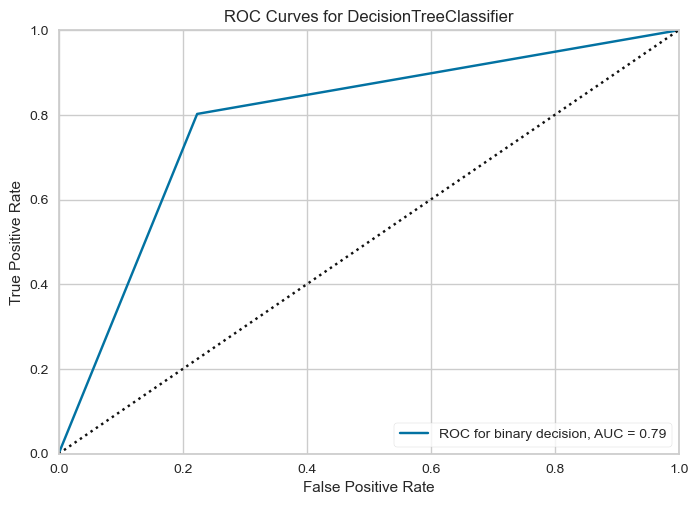

In [18]:
from yellowbrick.classifier import ROCAUC
model = DT_model
visualizer = ROCAUC(model,binary=True)
visualizer.fit(X_train_scaled, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show();

# Random Forest Model

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



# Bağımsız değişkenler (X) ve bağımlı değişken (y) ayırma
X = df.drop('Class', axis=1)
y = df['Class']

# Eğitim ve test veri setlerini oluşturma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest modelini oluşturma
RF_model =  RandomForestClassifier(n_estimators=5, random_state=42)
RF_model.fit(X_train, y_train)

# Model performansını değerlendirme
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Sonuçları yazdırma
print("Model Performansı:")
print("Doğruluk (Accuracy):", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nSınıflandırma Raporu:")
print(class_report)


Model Performansı:
Doğruluk (Accuracy): 0.8111111111111111

Confusion Matrix:
[[76 18]
 [16 70]]

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        94
           1       0.80      0.81      0.80        86

    accuracy                           0.81       180
   macro avg       0.81      0.81      0.81       180
weighted avg       0.81      0.81      0.81       180



##  ROC (Receiver Operating Curve) and AUC (Area Under Curve)

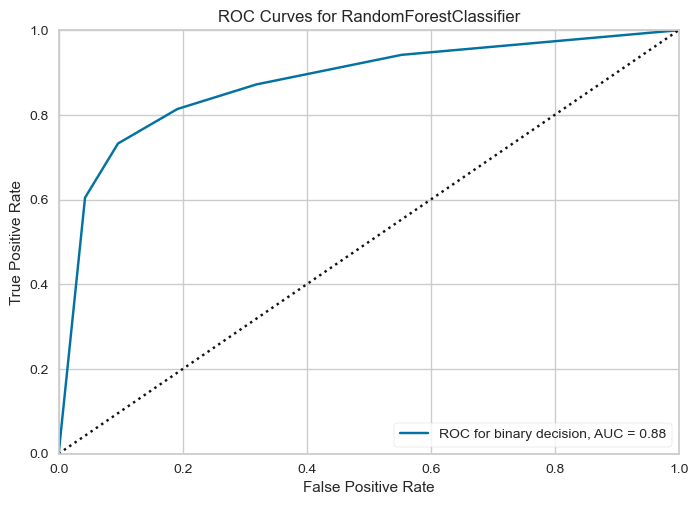

In [99]:
model = RF_model
visualizer = ROCAUC(model,binary=True)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();